In [116]:
import numpy as np
import matplotlib.pyplot as plt
import os 

from astropy.table import Table


import desispec.io
from desitarget.sv3 import sv3_targetmask 
import astropy

In [2]:
specprod = 'fuji'    # Internal name for the EDR
specprod_dir = desispec.io.specprod_root(specprod)
print(specprod_dir)

/global/cfs/cdirs/desi/spectro/redux/fuji


In [3]:
bright_zcat_file = os.path.join(specprod_dir, 'zcatalog', 'ztile-sv3-bright-cumulative.fits')

In [4]:
bright_zcat = Table.read(bright_zcat_file)

In [5]:
#only bgs bright galaxies
bgs_bright_ii = (bright_zcat['SV3_BGS_TARGET'] & sv3_targetmask.bgs_mask["BGS_BRIGHT"])!=0
print(np.count_nonzero(bgs_bright_ii))
bgs_bright_zcat = bright_zcat[bgs_bright_ii]
print(len(bgs_bright_zcat))

259613
259613


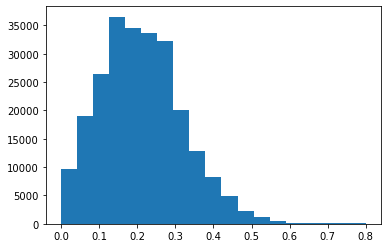

In [6]:
_ = plt.hist(bgs_bright_zcat['Z'], bins=np.linspace(0.0, 0.8, 20))

In [7]:
len(set(bgs_bright_zcat['TILEID']))

214

In [ ]:
# The link between rosette and TILEID is here https://desi.lbl.gov/trac/wiki/SurveyOps/OnePercent#Rosettefootprints

In [57]:
# here is the file from the LSS catalog
#lss_data = Table.read('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/fuji/LSScats/EDAbeta/BGS_BRIGHT_full.dat.fits')
lss_data = Table.read('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/fuji/LSScats/EDAbeta/BGS_BRIGHT_N_clustering.dat.fits')

In [58]:
lss_data

RA,DEC,TARGETID,NTILE,TILES,Z,COMP_TILE,rosette_number,rosette_r,FRACZ_TILELOCID,BITWEIGHTS [2],PROB_OBS,WEIGHT_ZFAIL,WEIGHT,flux_g_dered,flux_r_dered,flux_z_dered,flux_w1_dered,flux_w2_dered,NZ,WEIGHT_FKP,REST_GMR_0P1,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,EQ_ALL_0P0,EQ_ALL_0P1,ABSMAG_R
float64,float64,int64,int64,bytes43,float64,float64,float64,float64,float64,int64,float64,float64,float64,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
191.20458196461243,60.31535787110577,39633390185481345,1,100,0.08969256109731599,0.64,3.0,1.613220114177946,1.0,-1 .. -1,1.0,1.0,1.0,11.618794,18.39226,20.892622,13.421043,9.27371,0.04778151135868713,0.0030821516772042766,0.5107507237961553,-0.10918667636401896,-0.12125347071681446,0.09189331428141073,0.11205224487489494,0.47852499884987515,-0.08700178426439652,-0.08700178426439652,-17.752532357564764
187.04622815471808,60.82670180284912,39633396124617897,1,100,0.37400455377945924,0.64,3.0,1.6801915534232357,1.0,-1 .. -1,1.0,1.0,1.0,4.046807,16.82531,38.79777,85.02852,54.11833,0.0009577827729000268,0.133626516949366,0.8657535543881233,0.2757199965785285,0.9570932122099367,0.5034037640174682,1.319054690619937,0.7314758434170625,-0.36278441716607546,-0.36278441716607546,-21.20717884549835
187.83760708675698,60.38987543677365,39633393155049303,1,100,0.1731108191825362,0.64,3.0,1.7267282368438097,0.5,6932875859169517021 .. -6858338461939850770,0.4609375,1.0,2.15,13.26433,27.728409,46.020153,37.03337,25.867756,0.01270745015908088,0.01149149450827468,0.6595463164766608,-0.04866411688213576,0.09238961852108621,0.17196093424278175,0.3785062363399163,0.5940547497827482,-0.16791749460706012,-0.16791749460706012,-19.719994580683654
187.05117249536465,62.614542270156655,39633416324383107,1,100,0.2703579310142208,0.64,3.0,1.5579854421783794,1.0,-1 .. -1,1.0,1.0,1.0,4.4575434,17.798513,37.420948,46.075268,30.963612,0.004051015958871262,0.035183206585599834,0.9961770755006489,0.146409873660811,0.6534524026523496,0.3797334250181883,1.0502045184025013,0.8327485111078745,-0.2622471930837942,-0.2622471930837942,-20.42505494547267
191.14757099005186,60.345815959235,39633390185480938,1,100,0.2819459922463374,0.64,3.0,1.5743490921284766,0.5,4864741233190265570 .. 434972757299228716,0.359375,1.0,2.74468085106383,6.782468,16.732075,29.996437,31.939342,25.343126,0.004051015958871262,0.035183206585599834,0.6031055527358372,-0.0007029256786438565,0.3765973290806362,0.21603985022885944,0.6418090846178732,0.5546365731061034,-0.27348761247894726,-0.27348761247894726,-20.30376568408361
186.48359894373857,61.73967570511937,39633407801558322,1,100,0.08577825488213503,0.64,3.0,1.6169466967221486,1.0,8781239440956233492 .. -7057659983223072695,0.5546875,1.0,1.7916666666666667,15.079609,20.454126,26.065075,13.486019,10.797623,0.04778151135868713,0.0030821516772042766,0.34480053237283675,-0.10549431291824019,-0.11931835908501928,0.06879194820524737,0.061135194940372256,0.3386332394709298,-0.08320490723567098,-0.08320490723567098,-17.77278795503906
189.28672536137475,60.18713259808659,39633390168704731,1,100,0.21452305283357412,0.64,3.0,1.6400346453345047,1.0,-5560523680235883695 .. 5816301847492558499,0.546875,1.0,1.8169014084507042,6.3314033,19.638945,38.222126,43.818123,28.204218,0.00921472572098557,0.015778472793938094,0.9059159293142172,0.04341174620827673,0.3665416848139814,0.27036648397159835,0.7431065827594778,0.7563057691320424,-0.2080873612485669,-0.2080873612485669,-19.915113465885533
189.20703625254848,60.13450219401336,39633390168704208,1,100,0.1842724056985206,0.64,3.0,1.6990866107210438,0.5,-1 .. -1,1.0,1.0,1.0,20.873507,47.31153,86.10893,73.21894,58.1018,0.01270745015908088,0.01149149450827468,0.7111367437973818,-0.030741839754296674,0.1465510581719544,0.1934014143564434,0.4517835654815496,0.6300474905985266,-0.17874423352756497,-0.17874423352756497,-20.457178485102737
188.7298325265811,60.181046704454054,396333901645

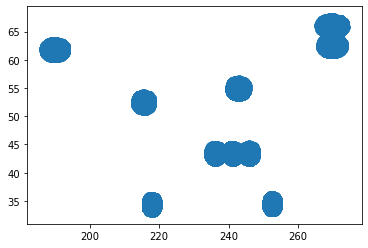

In [59]:
plt.scatter(lss_data['RA'], lss_data['DEC'])

In [63]:
list_rosette = np.array(list(set(lss_data['rosette_number'])), dtype='int')

In [64]:
list_rosette

array([ 3,  6,  7, 11, 12, 13, 14, 15, 18, 19])

2616 3


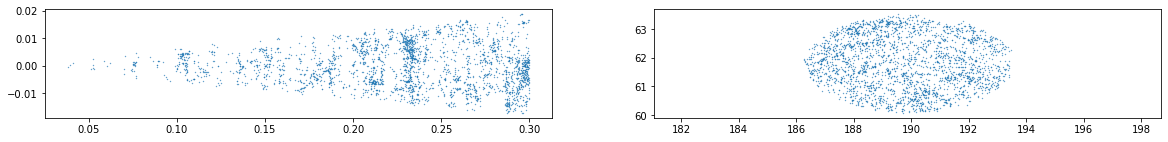

2149 6


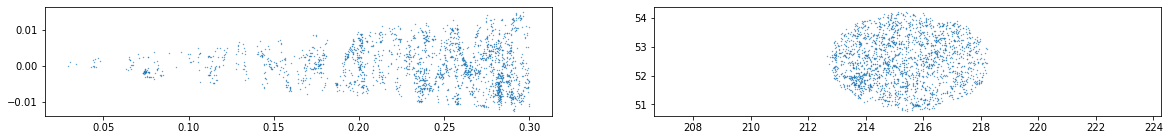

2314 7


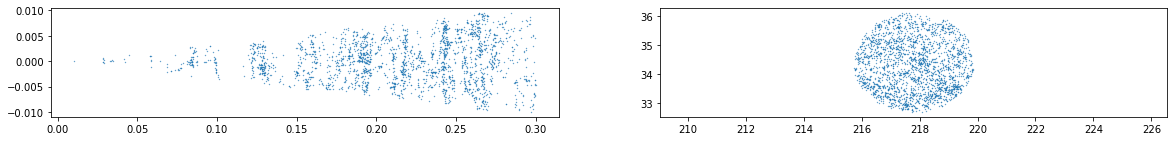

3237 11


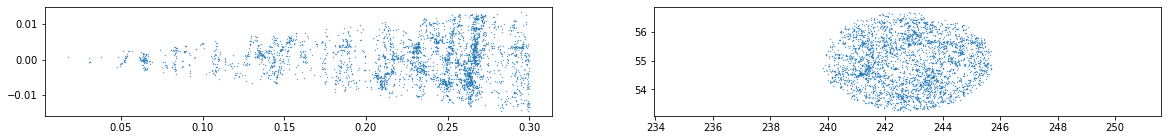

2506 12


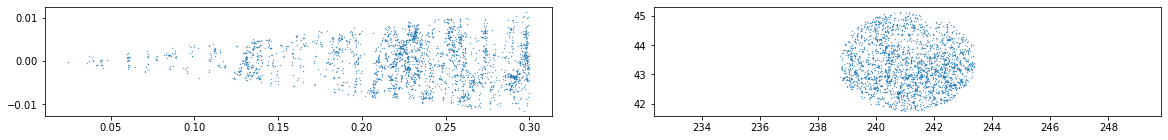

3565 13


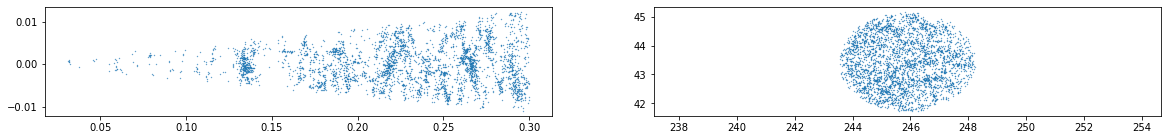

2073 14


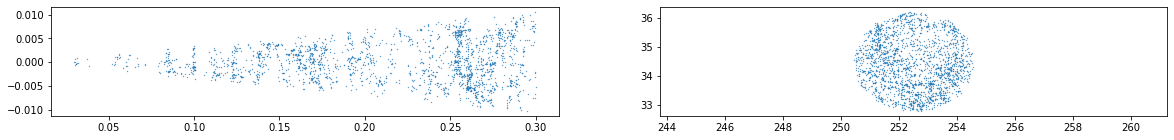

2151 15


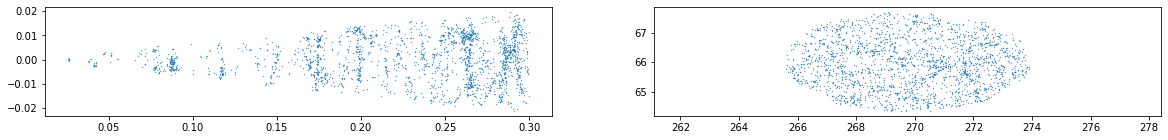

2188 18


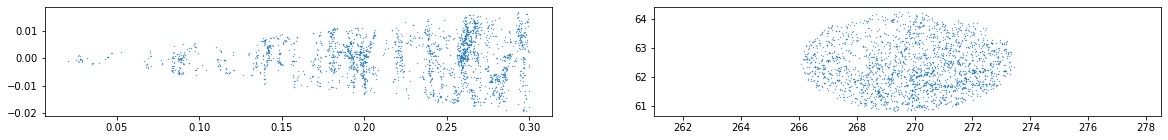

2266 19


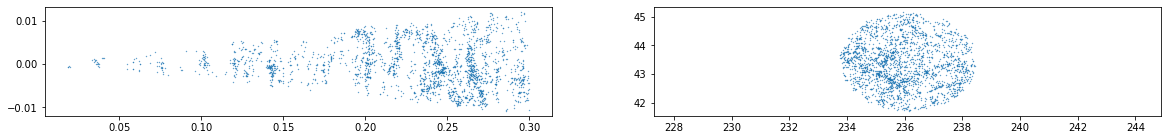

In [96]:
# Full description for the rosette footprints.
#https://desi.lbl.gov/trac/wiki/SurveyOps/OnePercent#Rosettefootprints
for rosette_id in list_rosette:
    ii = (lss_data['rosette_number']==rosette_id) & (lss_data['Z']<0.3) & (lss_data['ABSMAG_R']<-20.1826)
    data_rosette = lss_data[ii] 
    print(len(data_rosette), rosette_id)
    plt.figure(figsize=(20,2))
    #plt.subplot(1,2,1)
    #plt.scatter(data_rosette['RA'], data_rosette['DEC'], alpha=0.1)
    #plt.subplot(1,2,2, adjustable='box')

    plt.subplot(1,2,1)
    plt.scatter(data_rosette['Z'], 
                data_rosette['Z']*np.deg2rad(data_rosette['RA']-np.mean(data_rosette['RA'])), s=0.1)
    plt.subplot(1,2,2)
    plt.scatter(data_rosette['RA'], data_rosette['DEC'], s=0.1)
    plt.axis('equal')
    plt.show()

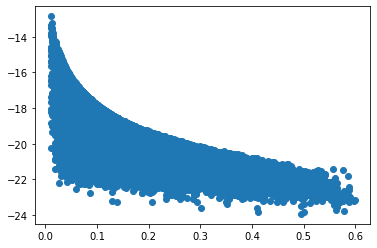

In [76]:
plt.scatter(lss_data['Z'], lss_data['ABSMAG_R'])

In [82]:
z_max_list = [0.1, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5]

for z_max in z_max_list:
    ii = lss_data['Z']>z_max
    absmag_r_max = np.max(lss_data['ABSMAG_R'][ii])
    n_in_vol = np.count_nonzero((lss_data['Z']<=z_max) & (lss_data['ABSMAG_R']<absmag_r_max))
    print(z_max, absmag_r_max, n_in_vol)


0.1 -17.82851513520599 6348
0.2 -19.300668796745292 18265
0.25 -19.789899469823162 22463
0.3 -20.182618967034653 25065
0.35 -20.5119326826208 22766
0.4 -20.796349674149578 18972
0.5 -21.42129109990171 8348


In [71]:
# read some random
random  = Table.read('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/fuji/LSScats/EDAbeta/BGS_BRIGHT_N_0_clustering.ran.fits')

In [72]:
random

TARGETID,RA,DEC,NTILE,TILES,rosette_number,rosette_r,COMP_TILE,Z,WEIGHT,flux_g_dered,flux_r_dered,flux_z_dered,flux_w1_dered,flux_w2_dered,REST_GMR_0P1,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,EQ_ALL_0P0,EQ_ALL_0P1,ABSMAG_R,NZ,WEIGHT_FKP
int64,float64,float64,int64,bytes43,int64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
327863312287006861,217.053993747975,32.844339582840995,2,208-211,7,1.6750873838143794,1.0,0.11164203080425152,1.0,16.752398,39.995556,70.44017,55.520756,33.046856,0.915952976228977,-0.08850879880917617,-0.05962420484772359,0.1382637459172572,0.32059025832551186,0.762511057782175,-0.10829276988012397,-0.10829276988012397,-19.10211372410505,0.020629919040898472,0.007109813568240832
327863312287006871,216.96105123277434,32.85843363693025,1,205,7,1.6924289577861624,0.36363636363636365,0.17006607486321823,1.0,17.261145,50.772038,95.972595,86.51835,58.623318,0.9708331934467196,-0.006817225331581564,0.19373629997169872,0.22374268328533742,0.5863589763961577,0.8087704256391797,-0.16496409261732167,-0.16496409261732167,-20.379069835223024,0.01270745015908088,0.01149149450827468
327863312287006915,217.05116530360402,32.847663141703265,2,208-211,7,1.6728731797200223,1.0,0.12407791124878899,1.0,12.439247,30.799921,55.921314,42.52743,28.144823,0.9223186582287874,-0.07224376057419128,-0.010172160013916298,0.15441323393659995,0.3723569253658956,0.7664465673597669,-0.12035557391132531,-0.12035557391132531,-19.069349994863504,0.020629919040898472,0.007109813568240832
327863312287006987,217.0442969494446,32.86749656185846,4,202-205-208-211,7,1.6566218761348026,1.0,0.29519256430832236,1.0,7.505207,20.609516,41.39181,62.151367,54.188667,0.6646931081103071,0.040283431133992076,0.4723539338635285,0.2612594670953083,0.76037760121093,0.5976454767242221,-0.2863367873790727,-0.2863367873790727,-20.672532037600863,0.0037103484810388407,0.03828987984086508
327863312287007608,217.05123979169434,32.85948789907687,3,205-208-211,7,1.6618672119726665,0.875,0.1392532867059546,1.0,28.714237,56.484135,95.529,88.01849,57.978134,0.6649568329364673,-0.07174105535170586,-0.0021245240303608,0.14925296529240942,0.2859968617290536,0.5978294678211683,-0.13507568810477596,-0.13507568810477596,-19.98489741904446,0.024789830191892435,0.005923803459921471
327863312287007688,216.98216862256743,32.86499544647257,2,205-211,7,1.6792381694892633,0.96,0.1862925566415733,1.0,10.031428,30.486742,59.99722,63.33252,43.458443,0.95724767272458,0.014238469661470562,0.2638618296517344,0.24331693492100676,0.6542709310835921,0.7959170365522583,-0.1807037799423261,-0.1807037799423261,-20.049300046617944,0.01270745015908088,0.01149149450827468
327863312287007980,216.99280256908355,32.85273945429143,1,205,7,1.6869210666857204,0.36363636363636365,0.13847340991630486,1.0,12.974714,23.628729,37.71484,31.965506,20.949081,0.5894639583868436,-0.07906313103525536,-0.017671071355692805,0.1353661181690568,0.2428278905007294,0.5433942457347336,-0.13431920761881572,-0.13431920761881572,-19.018865312258896,0.024789830191892435,0.005923803459921471
327863312287008123,217.0097205677191,32.830868129084884,1,211,7,1.701539079552833,0.45714285714285713,0.2640577030282996,1.0,5.0677323,18.087053,34.48449,37.821808,24.539997,0.9112552179519412,0.11332279183508151,0.5834533771057964,0.34018061053246756,0.9619596909197834,0.7596067228353405,-0.25613597193745063,-0.25613597193745063,-20.3571771331294,0.008313165722306719,0.017459766180288362
327863312287008353,217.0434195828927,32.83808660534789,2,208-211,7,1.6841780523815808,1.0,0.18567229657022383,1.0,16.744328,32.40063,51.725838,50.046062,40.64953,0.5618978432863326,-0.0626533005438939,0.09216371517856256,0.14710091275503107,0.34313934642371435,0.5206764253401057,-0.18010212767311712,-0.18010212767311712,-20.031087899727197,0.01270745015908088,0.01149149450827468


In [73]:
list_rosette_random = np.array(list(set(random['rosette_number'])), dtype='int')
print(list_rosette_random)

[ 3  6  7 11 12 13 14 15 18 19]


3 8149 215721


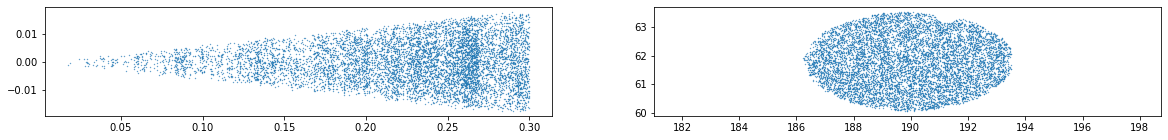

6 7982 215721


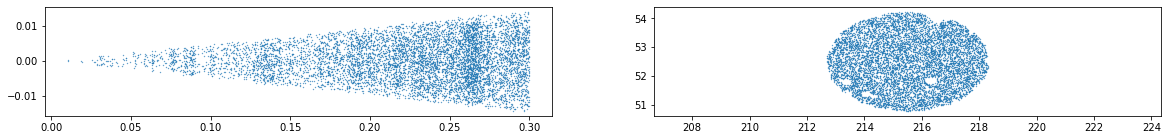

7 8086 215721


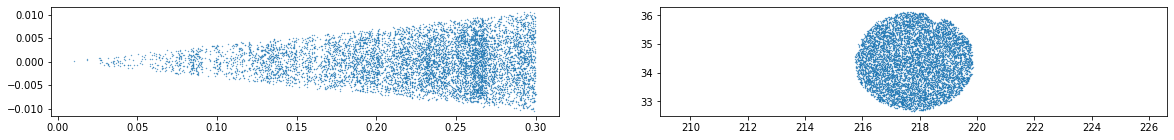

11 8039 215721


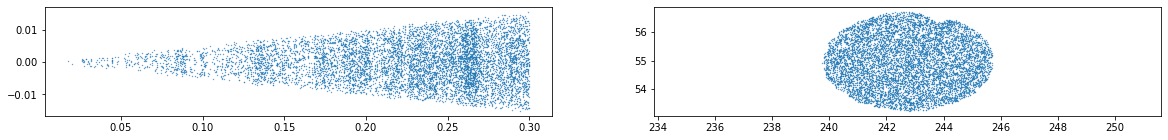

12 8039 215721


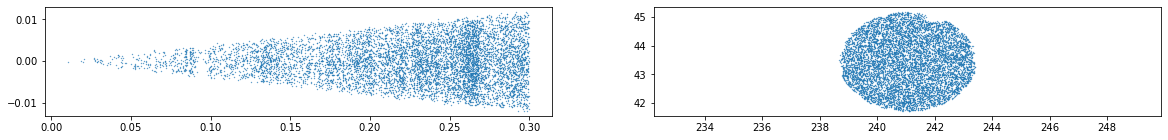

13 7860 215721


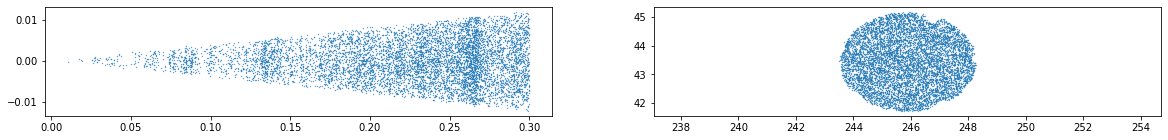

14 7867 215721


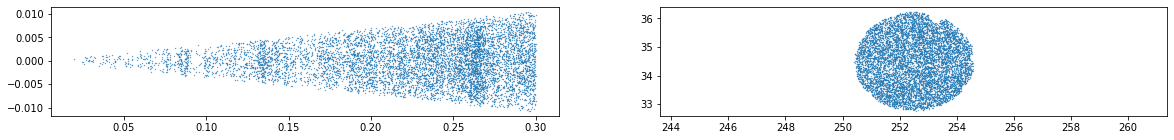

15 7793 215721


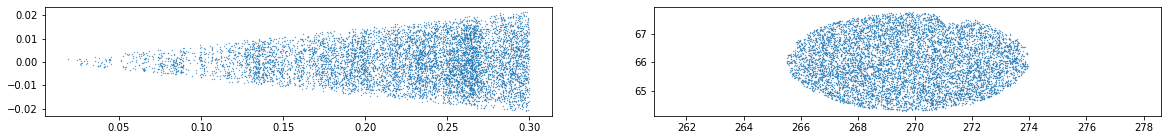

18 7854 215721


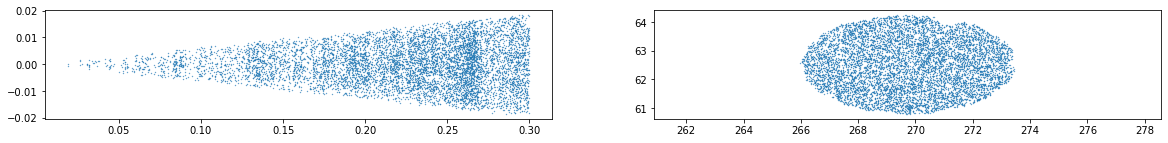

19 8133 215721


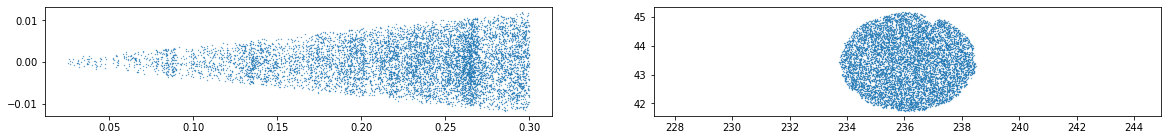

In [94]:
# Full description for the rosette footprints.
#https://desi.lbl.gov/trac/wiki/SurveyOps/OnePercent#Rosettefootprints
for rosette_id in list_rosette_random:
    ii = (random['rosette_number']==rosette_id) & (random['Z']<0.3) & (random['ABSMAG_R']<-20.1826)
    data_rosette = random[ii] 
    print(rosette_id, len(data_rosette), len(random))
    plt.figure(figsize=(20,2))
    plt.subplot(1,2,1)
    plt.scatter(data_rosette['Z'], 
                data_rosette['Z']*np.deg2rad(data_rosette['RA']-np.mean(data_rosette['RA'])), s=0.1)
    plt.subplot(1,2,2)
    plt.scatter(data_rosette['RA'], data_rosette['DEC'], s=0.1)
    plt.axis('equal')
    plt.show()

2616 7999
../data/radec_rosette_3_data.csv ../data/radec_rosette_3_random_9.csv
2149 8034
../data/radec_rosette_6_data.csv ../data/radec_rosette_6_random_9.csv
2314 8226
../data/radec_rosette_7_data.csv ../data/radec_rosette_7_random_9.csv
3237 8012
../data/radec_rosette_11_data.csv ../data/radec_rosette_11_random_9.csv
2506 8076
../data/radec_rosette_12_data.csv ../data/radec_rosette_12_random_9.csv
3565 8066
../data/radec_rosette_13_data.csv ../data/radec_rosette_13_random_9.csv
2073 7821
../data/radec_rosette_14_data.csv ../data/radec_rosette_14_random_9.csv
2151 7730
../data/radec_rosette_15_data.csv ../data/radec_rosette_15_random_9.csv
2188 7626
../data/radec_rosette_18_data.csv ../data/radec_rosette_18_random_9.csv
2266 8160
../data/radec_rosette_19_data.csv ../data/radec_rosette_19_random_9.csv


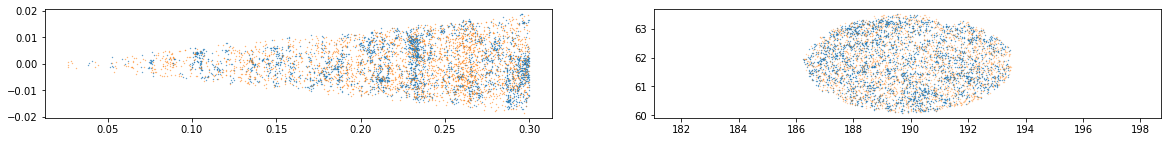

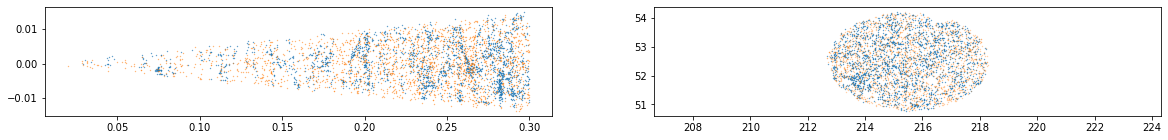

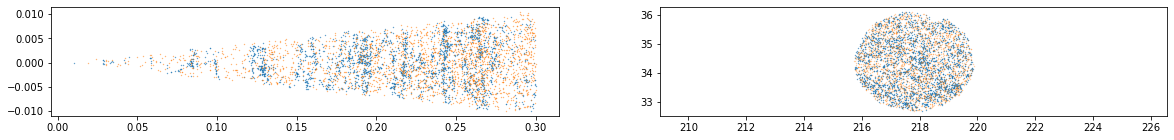

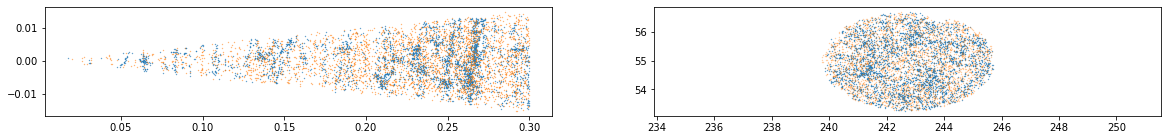

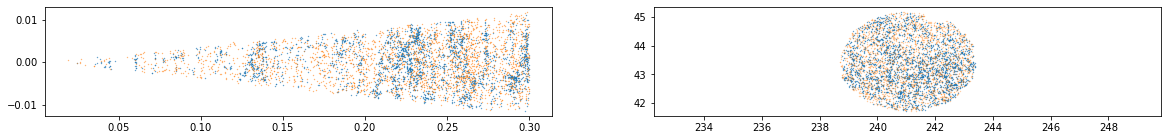

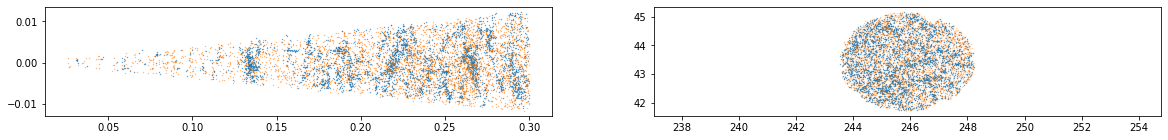

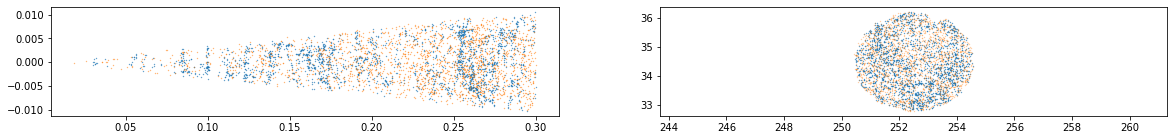

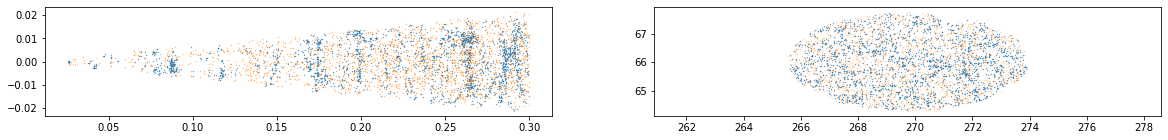

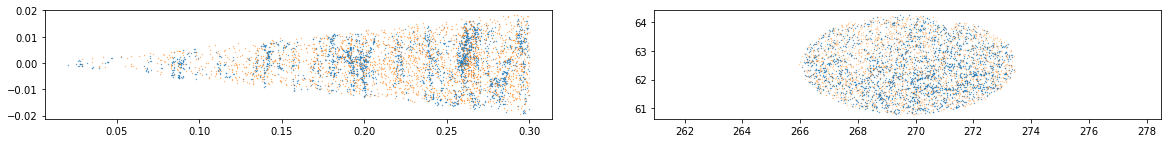

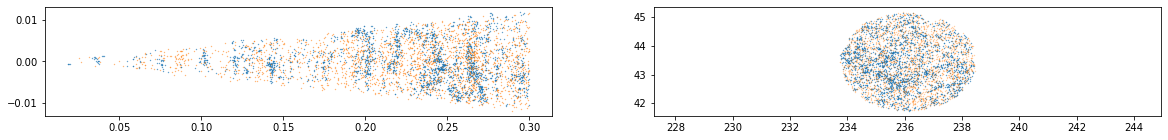

In [150]:
hemi = 'N'
rand_id = 9
lss_data = Table.read('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/fuji/LSScats/EDAbeta/BGS_BRIGHT_{}_clustering.dat.fits'.format(hemi))
random  = Table.read('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/fuji/LSScats/EDAbeta/BGS_BRIGHT_{}_{}_clustering.ran.fits'.format(hemi, rand_id))
max_z = 0.3
max_magabs_r = -20.1826
list_rosette = np.array(list(set(lss_data['rosette_number'])), dtype='int')
for rosette_id in list_rosette:
    
    ii = (lss_data['rosette_number']==rosette_id) & (lss_data['Z']<0.3) & (lss_data['ABSMAG_R']<-20.1826)
    data_rosette = lss_data[ii] 
    n_data = len(data_rosette)
    
    ii = (random['rosette_number']==rosette_id) & (random['Z']<0.3) & (random['ABSMAG_R']<-20.1826)
    random_rosette = random[ii]
    n_random = len(random_rosette)
    random_ids = np.arange(n_random)
    select_random_ids = np.random.choice(random_ids, n_data, replace=False)
    random_rosette = random_rosette[select_random_ids]
    
    print(n_data, n_random)

    
    plt.figure(figsize=(20,2))
    plt.subplot(1,2,1)
    plt.scatter(data_rosette['Z'], 
                data_rosette['Z']*np.deg2rad(data_rosette['RA']-np.mean(data_rosette['RA'])), s=0.1)
    plt.scatter(random_rosette['Z'], 
                random_rosette['Z']*np.deg2rad(random_rosette['RA']-np.mean(random_rosette['RA'])), s=0.1, alpha=0.8)    
    plt.subplot(1,2,2)
    plt.scatter(data_rosette['RA'], data_rosette['DEC'], s=0.1)
    plt.scatter(random_rosette['RA'], random_rosette['DEC'], s=0.1, alpha=0.5)
    plt.axis('equal')
    
    file_data = '../data/radec_rosette_{}_data.csv'.format(rosette_id)
    file_random = '../data/radec_rosette_{}_random_{}.csv'.format(rosette_id, rand_id)
    print(file_data, file_random)
    
    astropy.io.ascii.write(random_rosette[['RA', 'DEC', 'Z', 'TARGETID']], file_random, format='csv', overwrite=True)
    astropy.io.ascii.write(data_rosette[['RA', 'DEC', 'Z', 'TARGETID']], file_data, format='csv', overwrite=True)


In [125]:
astropy.io.ascii.write(random_rosette[['RA', 'DEC', 'Z', 'TARGETID']], 'test.csv', format='csv', overwrite=True)